# Exploring a Trained Dynamic Topic Model

This notebook explores a trained DTM from a run of `src/models/train_dtm.py` for exploration and analysis.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import numpy as np
from src.models.dtm import Dtm
%matplotlib inline

In [3]:
model = Dtm.load('2019-03-17T11:09:35')
model.summary([1975, 1995, 2015])

Topic 0
           1975         1995         2015
0        people  sovereignty      america
1          viet  territorial       states
2           nam    integrity  sovereignty
3     socialist     republic    integrity
4           non       korean  territorial
5       foreign        korea     relation
6   imperialist        south     republic
7         korea     relation        south
8  interference       states        latin
9       country    peninsula        korea

Topic 1
      1975     1995     2015
0    world    world    world
1      man      war   people
2  history     cold   nation
3      war  century     year
4   nation      new   future
5     time  history  history
6    today   people    today
7  century   nation     time
8   people     year      war
9    great      era     come

Topic 2
         1975          1995          2015
0    republic        united        united
1     welcome       nations       mission
2     germany  peacekeeping      republic
3   admission      republ

## Plotting Topic Term Probabilities Over Time

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b69c3b630>)

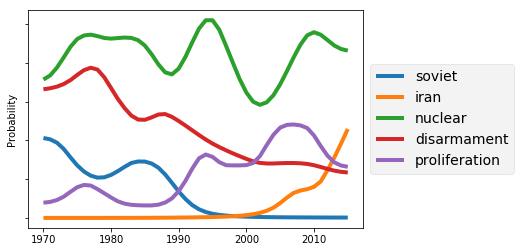

In [74]:
model.plot_terms(7, ['soviet', 'iran', 'nuclear', 'disarmament', 'proliferation'])

## Automatic Labelling of Topics

In [75]:
times = [1975, 1995, 2015]
for topic in range(model.num_topics):
    display(HTML('<h3>%s</h3>' % model.label_topic(topic, condense=3)))
    top_terms = model.top_term_table(topic, times)
    top_labels = model.top_label_table(topic, times)
    df = pd.concat([top_terms, top_labels], axis=1)
    arrays = [['Term', 'Term', 'Term', 'Label', 'Label', 'LHumanHabel'],
              list(map(str, times * 2))]
    df.columns = pd.MultiIndex.from_arrays(arrays, names=('Type', 'Year'))
    display(HTML(df.to_html()))